In [91]:
import pandas as pd;
import math
import numpy as np
%matplotlib inline
from matplotlib import pylab as plt;
import matplotlib
matplotlib.rcParams.update({'font.size': 13})


## Подготовка данных для работы
- изменение каких-либо значений
- группировка данных любым способом(например, значение какого-то параметра больше или меньше какого-то числа)

In [142]:
data = pd.read_csv("data_v2.csv", sep=";");
def changeSex(x):
    if x == 1:
        return "м"
    else:
        return "ж"

data["Пол"] = data["Пол"].apply(changeSex)

data = data.fillna(0, axis=1)

In [143]:
data

,№,Дата,БА,норма,Возраст,Пол,рост,вес,ИМТ,Длит АГ,...,%нейтрофилов,%лимфоцитов,%моноцитов,%эозинофилов,%базлфилов,нейтрофилы абсолюное значение,лимфоциты абсолютное значение,моноциты абсолютное значение,эозинофилы абсолютное значение,базофилы абсолютное значение
0,1,25.09.2013,1.0,0.0,73.0,f,1.59,85.0,33.62,25.0,...,54.9,36.4,7.93,0.12,0.69,2.7,1.8,0.39,0.01,0.03
1,2,25.11.2013,1.0,0.0,67.0,f,1.56,92.0,37.80,25.0,...,64.5,28.1,6.57,0.44,0.40,5.4,2.4,0.55,0.04,0.03
2,3,26.11.2013,1.0,0.0,61.0,f,1.65,78.0,28.65,7.0,...,52.6,36.9,7.56,2.14,0.72,3.4,2.4,0.48,0.14,0.05
3,4,02.12.2013,1.0,0.0,33.0,m,1.76,125.0,40.35,3.0,...,59.7,29.3,6.81,3.05,1.22,4.7,2.3,0.54,0.24,0.10
4,5,19.12.2013,1.0,0.0,64.0,m,1.85,95.0,27.76,15.0,...,65.1,28.5,3.34,2.42,0.62,5.1,2.2,0.26,0.19,0.05
5,6,14.02.2014,1.0,0.0,36.0,m,1.65,70.0,25.71,2.0,...,66.0,27.5,6.50,0.00,0.00,6.2,2.6,0.24,0.14,0.05
6,7,02.11.2014,1.0,0.0,62.0,m,1.71,79.0,27.02,1.0,...,61.5,25.4,8.47,2.94,1.74,3.3,1.4,0.46,0.16,0.09
7,8,10.04.2014,1.0,0.0,70.0,m,1.90,110.0,30.47,10.0,...,68.5,20.6,9.37,0.77,0.74,5.0,1.5,0.68,0.06,0.05
8,9,20.05.2014,1.0,0.0,68.0,f,1.56,89.0,36.57,25.0,...,48.0,38.5,9.17,3.19,1.13,2.9,2.3,0.55,0.19,0.07
9,10,03.03.2015,1.0,0.0,54.0,f,1.67,70.0,25.10,2.0,...,63.5,30.3,0.23,0.93,1.07,3.4,1.6,0.23,0.05,0.06


In [7]:
def getRowsByRange(data,field, fr, to):
    return data[(data[field] >= fr) & (data[field] < to)]



## Уровень холестерина в зависимости от наличия бронхиальной астмы по возрастным группам

[]

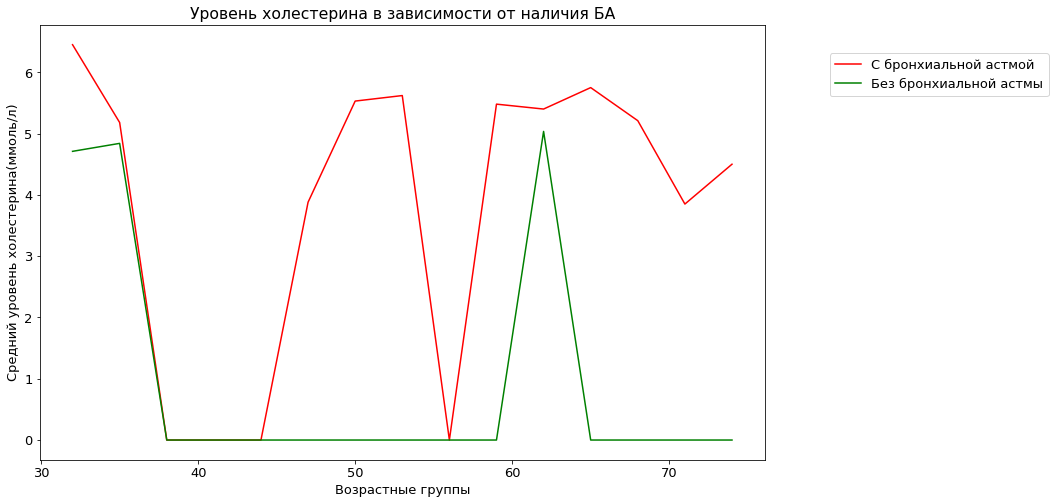

In [96]:
#bloodAnalysis = data[data[""]]

plt.figure(figsize=(13, 8))
intervals = [];
start = int(min(data["Возраст"]))
end = int(max(data["Возраст"]))
step = 3;
ages = [];
hol1 = [];
hol2 = [];
for i in range(start, end, step):
    t = getRowsByRange(data[data["БА"] > 0], "Возраст", i, i + step)
    d = getRowsByRange(data[data["БА"] == 0], "Возраст", i, i + step)
    h1 = t.mean()["Холестерин"]
    h1 = np.nan_to_num(h1)
    h2 = d.mean()["Холестерин"]
    h2 = np.nan_to_num(h2)
    hol1.append(h1)
    hol2.append(h2)
    intervals.append(len(getRowsByRange(data, "Возраст", i, i+step)));
    ages.append(i)
    
plt.plot(ages, hol1, color='red', label=u"С бронхиальной астмой")
plt.plot(ages, hol2, color='green', label=u"Без бронхиальной астмы")
plt.title(u"Уровень холестерина в зависимости от наличия БА")
plt.xlabel(u"Возрастные группы");
plt.ylabel(u"Средний уровень холестерина(ммоль/л)");
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.plot()

## Уровень СОЭ в зависимости от наличия бронхиальной астмы по возрастным группам

[]

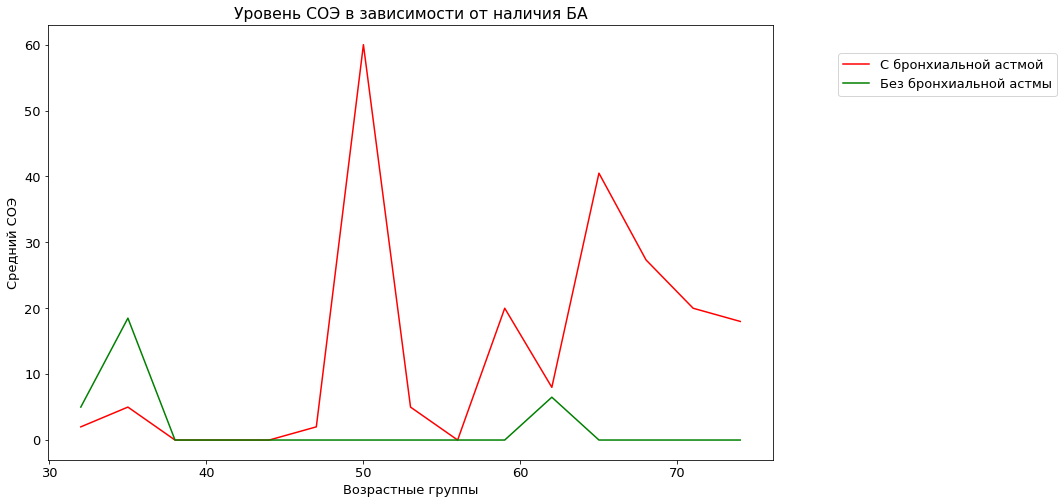

In [136]:
plt.figure(figsize=(13, 8))
intervals = [];
start = int(min(data["Возраст"]))
end = int(max(data["Возраст"]))
step = 3;
ages = [];
hol1 = [];
hol2 = [];
for i in range(start, end, step):
    t = getRowsByRange(data[data["БА"] > 0], "Возраст", i, i + step)
    d = getRowsByRange(data[data["БА"] == 0], "Возраст", i, i + step)
    h1 = t.mean()["СОЭ"]
    h1 = np.nan_to_num(h1)
    h2 = d.mean()["СОЭ"]
    h2 = np.nan_to_num(h2)
    hol1.append(h1)
    hol2.append(h2)
    intervals.append(len(getRowsByRange(data, "Возраст", i, i+step)));
    ages.append(i)
    
plt.plot(ages, hol1, color='red', label=u"С бронхиальной астмой")
plt.plot(ages, hol2, color='green', label=u"Без бронхиальной астмы")
plt.title(u"Уровень СОЭ в зависимости от наличия БА")
plt.xlabel(u"Возрастные группы");
plt.ylabel(u"Средний СОЭ");
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.plot()

## Выведем данные о курении для пациентов с бронхиальной астмой

In [124]:
paramsToShow = ["№", "БА","Кур_наст_вр", "Длит_кур", "К-во сиг", "Кур_ран"];
data[data["БА"] > 0].ix[:, paramsToShow]

,№,БА,Кур_наст_вр,Длит_кур,К-во сиг,Кур_ран
0,1,1.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,15.0,20.0,0.0
4,5,1.0,0.0,0.0,0.0,0.0
5,6,1.0,1.0,15.0,20.0,1.0
6,7,1.0,0.0,0.0,0.0,0.0
7,8,1.0,0.0,5.0,10.0,1.0
8,9,1.0,0.0,0.0,0.0,0.0
9,10,1.0,0.0,0.0,0.0,0.0


## Выведем данные о курении для пациентов без бронхиальной астмы

In [125]:
data[data["БА"] == 0].ix[:, paramsToShow]

,№,БА,Кур_наст_вр,Длит_кур,К-во сиг,Кур_ран
15,16,0.0,0.0,0.0,0.0,0.0
16,17,0.0,0.0,0.0,0.0,0.0
17,18,0.0,0.0,10.0,20.0,1.0
18,19,0.0,0.0,0.0,0.0,0.0
19,20,0.0,0.0,0.0,0.0,0.0


## Выведем данные, касаемые анализа крови
- можно также вывести только тех пациентов, которые имеют значение любого параметра ниже(выше) нормы

In [132]:
bloodLabels = ["№", "БА","лейкоциты", "эритроциты",
               "гемоглобин", "гематокрит","Тромбоциты", 
               "тромбокрит", "%нейтрофилов", "%лимфоцитов",
               "%моноцитов","%эозинофилов","%базлфилов",
               "нейтрофилы абсолюное значение",
               "лимфоциты абсолютное значение",
               "моноциты абсолютное значение",
               "эозинофилы абсолютное значение",
               "базофилы абсолютное значение"];

In [133]:
data[data["БА"] > 0].ix[:, bloodLabels]

,№,БА,лейкоциты,эритроциты,гемоглобин,гематокрит,Тромбоциты,тромбокрит,%нейтрофилов,%лимфоцитов,%моноцитов,%эозинофилов,%базлфилов,нейтрофилы абсолюное значение,лимфоциты абсолютное значение,моноциты абсолютное значение,эозинофилы абсолютное значение,базофилы абсолютное значение
0,1,1.0,4.9,4.12,13.30,37.7,178.0,0.18,54.9,36.4,7.93,0.12,0.69,2.7,1.8,0.39,0.01,0.03
1,2,1.0,8.4,4.43,11.80,35.6,231.0,0.23,64.5,28.1,6.57,0.44,0.40,5.4,2.4,0.55,0.04,0.03
2,3,1.0,6.4,4.51,13.38,40.7,251.0,0.17,52.6,36.9,7.56,2.14,0.72,3.4,2.4,0.48,0.14,0.05
3,4,1.0,8.0,5.42,16.30,49.8,306.0,0.24,59.7,29.3,6.81,3.05,1.22,4.7,2.3,0.54,0.24,0.10
4,5,1.0,7.8,4.38,13.30,39.7,275.0,0.22,65.1,28.5,3.34,2.42,0.62,5.1,2.2,0.26,0.19,0.05
5,6,1.0,9.2,4.89,14.20,40.1,260.0,0.24,66.0,27.5,6.50,0.00,0.00,6.2,2.6,0.24,0.14,0.05
6,7,1.0,5.4,4.62,14.00,41.5,248.0,0.19,61.5,25.4,8.47,2.94,1.74,3.3,1.4,0.46,0.16,0.09
7,8,1.0,7.3,4.14,12.80,40.0,212.0,0.22,68.5,20.6,9.37,0.77,0.74,5.0,1.5,0.68,0.06,0.05
8,9,1.0,6.0,4.89,13.40,39.4,225.0,0.20,48.0,38.5,9.17,3.19,1.13,2.9,2.3,0.55,0.19,0.07
9,10,1.0,5.3,5.84,15.50,51.7,129.0,0.10,63.5,30.3,0.23,0.93,1.07,3.4,1.6,0.23,0.05,0.06


#  Дальнейшие исследования:

Представьте, что исследуем данные не 20 пациентов со 100 параметрами, а 100 000 пациентов с 10 000  параметрами. Задача - как значения различных параметров связаны между собой, какая существует корреляция, какие параметры первичные, а какие зависимые (вторичные) и какова динамика изменений зависимых параметров от изменения первичных. Сколько существует вторичных параметров зависящих от одного и того же первичного параметра?

Например, как меняется %лимфоцитов в зависимости от веса или/и роста? Есть ли какая-то связь между высокими уровнем тромбоцитов и наличием какого-либо заболевания?

С помощью данного инструмента можно написать программу для проверки имеется ли взаимосвязь между каждыми 2-мя, 3-мя и более параметрами, в автоматическом режиме, без участия человека. Программа сама анализирует весь массив данных и ищет зависимости. Уже найденные варианты смотрит врач. 

Преимущество этого подхода, помимо ускорения самого процесса анализа, состоит в том, что могут быть найдены зависимости, до этого неизвестные врачу. 
Когда зависимости ищет человек, он заведомо может отбрасывать проверку корреляций(зависимостей) тех параметров, которые ему кажутся совсем несвязанными, но в то же время никто не гарантирует, что этих зависимостей действительно нет, может они просто еще не обнаружены?.
Когда анализ делает машина, ей ничего не мешает искать новые и новые взаимосвязи. К тому же это в разы быстрее, чем это мог бы делать человек.

## Алгоритм

**Шаг 1:**
 Составляем все возможные комбинации из имеющихся параметров по n штук(по 2, например)<br>
**Результат шага 1:**
 Получаем все возможные комбинации по n штук

Для каждой пары параметров проверяем имеется ли зависимость. Для этого делаем:

**Шаг 2:**
 Пытаемся найти нижнюю границу для данного набора параметров(функцию, которая бы ограничивала
 исходное множетсво параметров снизу). Если такая функция найдена -> можно судить о том, что зависимость есть, иначе нет.<br>
**Результат шага 2:**
 Получен ответ есть ли зависимость или нет.
 
**Шаг 3:**
  Вывод результатов(тех комбинаций параметров, между которые есть зависимость)<br>
  Также возможна группировка данных параметров по группам(группировка зависимостей от одного параметра)

**Примечание:**
Вся сложность с точки зрения проектирования и реализации заключена в шаге 2. Здесь есть много тонкостей каким образом мы описываем поведение параметров, как мы работаем с экстремальными значениями, то есть не типичными для остальной части параметров. <br>
Например, значение эритроцитов в среднем колеблется от x1 до x2, но для одного пациента из 10000 значение получено k\*x2(k - целое положительное число, например, 9), то есть заведомо большее, чем норма, как следует обрабатывать такие значение? С какого значения k точка считается выбросом?
